# Chapter 6

## Question 9

Regularisation on the `College` data set

In [35]:
import statsmodels.api as sm
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics
import numpy as np
import matplotlib.pyplot as plt

In [13]:
college = sm.datasets.get_rdataset("College", "ISLR").data
college["Private"] = college["Private"] == "Yes"
college.head()


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,True,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,True,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,True,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,True,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,True,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### (a) Split the data set into a training set and a test set

In [14]:
X = college.drop(columns=["Apps"])
y = college["Apps"]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33)


### (b) Fit a linear model using least squares, and report the test error

In [23]:
least_squares = sklearn.linear_model.LinearRegression()
least_squares.fit(X_train,y_train)
y_pred = least_squares.predict(X_test)
least_squares_mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(least_squares_mse)

1543607.976923507


In [20]:
# The above is vast!

### (c) Fit a ridge regression model, choosing $\lambda$ by CV. Report the test error

In [32]:
ridge = sklearn.linear_model.RidgeCV(alphas= np.linspace(0.001,10,num=1000))
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
ridge_mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(ridge_mse)

1540869.3506382525


### (d) Fit a lasso model, choosing $\lambda$ by CV. Report the test error, along with the number of non-zero coefficients.

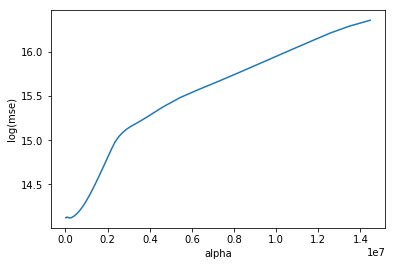

In [44]:
# Use the LassoCV
lasso_model = sklearn.linear_model.LassoCV(cv=5, max_iter=1e6)
lasso_model.fit(X_train,y_train)

mses = list(map(np.mean,lasso_model.mse_path_))
alphas = lasso_model.alphas_
plt.plot(alphas,np.log(mses))
plt.ylabel("log(mse)")
plt.xlabel("alpha")
plt.show()

In [45]:
print(lasso_model.coef_)
print(lasso_model.intercept_)

[-0.          1.13994327  0.          0.          0.          0.11204901
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.11235193  0.        ]
-791.1529529553018


In [46]:
y_pred = lasso_model.predict(X_test)
lasso_mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
lasso_mse

1900521.5684322468

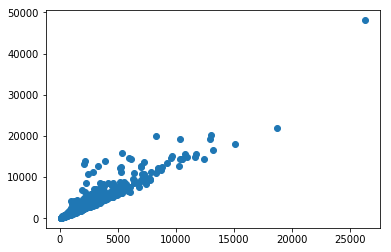

In [48]:
plt.scatter(college["Accept"], college["Apps"])  # Lasso suggests a roughly one-to-one mapping between these

### (e) Fit a PCR model, with M chosen by cross-validation. Report the test error, along with the value of M selected.